# Github Issue

## Somehow, the notebook for this project can't be read on Github. Thus, I will also upload a pdf and html for this project. You can also find the notebook in the folder.

# Purpose

In this notebook, we will investigate how Covid-19 affect the happiness of the world. Three datasets will be used:
The first two are datasets from the world happiness report from 2019 to 2021 respectively.
The last dataset is the worldwide Covid-19 data.

# Questions we care about:

1/ What are the happiness scores across countries before Covid?

2/ What are the happiness scores across countries after Covid?

3/ How many people die due to Covid?

4/ How did Covid affect happiness score?

To answer these questions, we will take a look at the happiness scores of the countries before and after Covid.

# Loading Necessary Modules and Data

In [237]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [238]:
# the supplied CSV data file is the raw_data directory
world_happiness_2019 = pd.read_csv('2019.csv')
world_happiness_2021 = pd.read_csv('2021.csv')
covidtill2021 = pd.read_csv('worldwide covid data.csv')

# Data Wrangling

Before doing any analysis, let's take a look at the data and check if there is any null or duplicate.

In [239]:
world_happiness_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [240]:
world_happiness_2019.describe(include = 'all')

Overall rank Country or region       Score  GDP per capita  \
count     156.000000               156  156.000000      156.000000   
unique           NaN               156         NaN             NaN   
top              NaN              Iran         NaN             NaN   
freq             NaN                 1         NaN             NaN   
mean       78.500000               NaN    5.407096        0.905147   
std        45.177428               NaN    1.113120        0.398389   
min         1.000000               NaN    2.853000        0.000000   
25%        39.750000               NaN    4.544500        0.602750   
50%        78.500000               NaN    5.379500        0.960000   
75%       117.250000               NaN    6.184500        1.232500   
max       156.000000               NaN    7.769000        1.684000   

        Social support  Healthy life expectancy  Freedom to make life choices  \
count       156.000000               156.000000                    156.000000   
unique             NaN                      NaN                           NaN   
top                NaN                      NaN                           NaN   
freq               NaN                      NaN                           NaN   
mean          1.208814                 0.725244                      0.392571   
std           0.299191                 0.242124                      0.143289   
min           0.000000                 0.000000                      0.000000   
25%           1.055750                 0.547750                      0.308000   
50%           1.271500                 0.789000                      0.417000   
75%           1.452500                 0.881750                      0.507250   
max           1.624000                 1.141000                      0.631000   

        Generosity  Perceptions of corruption  
count   156.000000                 156.000000  
unique         NaN                        NaN  
top            NaN                        NaN  
freq           NaN                        NaN  
mean      0.184846                   0.110603  
std       0.095254                   0.094538  
min       0.000000                   0.000000  
25%       0.108750                   0.047000  
50%       0.177500                   0.085500  
75%       0.248250                   0.141250  
max       0.566000                   0.453000

Glancing from the description of the dataset, it seems there is no null value. Now, let's check 2021 world happiness dataset.

In [241]:
world_happiness_2021.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [242]:
world_happiness_2021.describe(include = 'all')

Country name  Regional indicator  Ladder score  \
count           149                 149    149.000000   
unique          149                  10           NaN   
top            Iran  Sub-Saharan Africa           NaN   
freq              1                  36           NaN   
mean            NaN                 NaN      5.532839   
std             NaN                 NaN      1.073924   
min             NaN                 NaN      2.523000   
25%             NaN                 NaN      4.852000   
50%             NaN                 NaN      5.534000   
75%             NaN                 NaN      6.255000   
max             NaN                 NaN      7.842000   

        Standard error of ladder score  upperwhisker  lowerwhisker  \
count                       149.000000    149.000000    149.000000   
unique                             NaN           NaN           NaN   
top                                NaN           NaN           NaN   
freq                               NaN           NaN           NaN   
mean                          0.058752      5.648007      5.417631   
std                           0.022001      1.054330      1.094879   
min                           0.026000      2.596000      2.449000   
25%                           0.043000      4.991000      4.706000   
50%                           0.054000      5.625000      5.413000   
75%                           0.070000      6.344000      6.128000   
max                           0.173000      7.904000      7.780000   

        Logged GDP per capita  Social support  Healthy life expectancy  \
count              149.000000      149.000000               149.000000   
unique                    NaN             NaN                      NaN   
top                       NaN             NaN                      NaN   
freq                      NaN             NaN                      NaN   
mean                 9.432208        0.814745                64.992799   
std                  1.158601        0.114889                 6.762043   
min                  6.635000        0.463000                48.478000   
25%                  8.541000        0.750000                59.802000   
50%                  9.569000        0.832000                66.603000   
75%                 10.421000        0.905000                69.600000   
max                 11.647000        0.983000                76.953000   

        Freedom to make life choices  Generosity  Perceptions of corruption  \
count                     149.000000  149.000000                 149.000000   
unique                           NaN         NaN                        NaN   
top                              NaN         NaN                        NaN   
freq                             NaN         NaN                        NaN   
mean                        0.791597   -0.015134                   0.727450   
std                         0.113332    0.150657                   0.179226   
min                         0.382000   -0.288000                   0.082000   
25%                         0.718000   -0.126000                   0.667000   
50%                         0.804000   -0.036000                   0.781000   
75%                         0.877000    0.079000                   0.845000   
max                         0.970000    0.542000                   0.939000   

        Ladder score in Dystopia  Explained by: Log GDP per capita  \
count               1.490000e+02                        149.000000   
unique                       NaN                               NaN   
top                          NaN                               NaN   
freq                         NaN                               NaN   
mean                2.430000e+00                          0.977161   
std                 5.347044e-15                          0.404740   
min                 2.430000e+00                          0.000000   
25%                 2.430000e+00                          0.666000   
50%          

It seems there is no null value in the 2021. However, many columns in the 2021 dataset are not in the 2019 dataset. Some columns are also named differently. In addition, the number of countries of the 2019 dataset is smaller than the 2021 dataset. We need to take a closer look at this.

Since we want to directly compare the two datasets, we will drop the columns in the 2021 dataset that are not in the 2019 dataset. 

In [243]:
columnstodrop=['Standard error of ladder score','upperwhisker','lowerwhisker','Ladder score in Dystopia','Explained by: Log GDP per capita'
              ,'Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Generosity','Explained by: Perceptions of corruption'
              ,'Explained by: Perceptions of corruption','Dystopia + residual','Explained by: Freedom to make life choices']

In [244]:
world_happiness_2021.drop(columns=columnstodrop,inplace=True)

In [245]:
world_happiness_2019.drop(columns=['Overall rank'],inplace=True)

Now, let's rename some of the columns so they are consistent across the datasets.

In [246]:
world_happiness_2021.rename(columns={"Country name":"Country or region","Ladder score":"Score"},
                            inplace=True)

In [247]:
world_happiness_2021.head()

Country or region Regional indicator  Score  Logged GDP per capita  \
0           Finland     Western Europe  7.842                 10.775   
1           Denmark     Western Europe  7.620                 10.933   
2       Switzerland     Western Europe  7.571                 11.117   
3           Iceland     Western Europe  7.554                 10.878   
4       Netherlands     Western Europe  7.464                 10.932   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.954                     72.0                         0.949   
1           0.954                     72.7                         0.946   
2           0.942                     74.4                         0.919   
3           0.983                     73.0                         0.955   
4           0.942                     72.4                         0.913   

   Generosity  Perceptions of corruption  
0      -0.098                      0.186  
1       0.030                      0.179  
2       0.025                      0.292  
3       0.160                      0.673  
4       0.175                      0.338

In [248]:
world_happiness_2019.head()

Country or region  Score  GDP per capita  Social support  \
0           Finland  7.769           1.340           1.587   
1           Denmark  7.600           1.383           1.573   
2            Norway  7.554           1.488           1.582   
3           Iceland  7.494           1.380           1.624   
4       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [249]:
country_2019=set(world_happiness_2019['Country or region'].to_list())

In [250]:
country_2021=set(world_happiness_2021['Country or region'].to_list())

Now, let's check which countries are in the 2021 dataset and not the 2019 dataset.

In [251]:
country_2021.difference(country_2019)

{'Hong Kong S.A.R. of China',
 'Maldives',
 'North Cyprus',
 'Taiwan Province of China'}

Now, let's check which countries are in the 2019 dataset and not the 2021 dataset.

In [252]:
country_2019.difference(country_2021)

{'Bhutan',
 'Central African Republic',
 'Congo (Kinshasa)',
 'Hong Kong',
 'Northern Cyprus',
 'Qatar',
 'Somalia',
 'South Sudan',
 'Syria',
 'Taiwan',
 'Trinidad & Tobago'}

It seems some of the names of some countries are inconsistent across the datasets. Some countries in one dataset are not listed in the other. We will rename the countries with inconsistency and drop the rest.

In [253]:
world_happiness_2021.loc[world_happiness_2021['Country or region']=='Hong Kong S.A.R. of China','Country or region']='Hong Kong'
world_happiness_2021.loc[world_happiness_2021['Country or region']=='Taiwan Province of China','Country or region']='Taiwan'
world_happiness_2021.loc[world_happiness_2021['Country or region']=='North Cyprus','Country or region']='Northern Cyprus'

In [254]:
world_happiness_2021.drop(world_happiness_2021.index[world_happiness_2021['Country or region']=='Maldives'].tolist(),inplace=True)

In [255]:
country_2021=set(world_happiness_2021['Country or region'].to_list())
country_2019=set(world_happiness_2019['Country or region'].to_list())

In [256]:
countrytodrop=list(country_2019.difference(country_2021))

In [257]:
for i in countrytodrop:
    world_happiness_2019.drop(world_happiness_2019.index[world_happiness_2019['Country or region']==i],inplace=True)

In [258]:
country_2019=set(world_happiness_2019['Country or region'].to_list())

In [259]:
country_2021=set(world_happiness_2021['Country or region'].to_list())

In [260]:
country_2021.difference(country_2019)

set()

In [261]:
country_2019.difference(country_2021)

set()

Let's also add a column in 2019 on the region of the country using the 2021 dataset.

In [262]:
world_happiness_2019=world_happiness_2019.merge(world_happiness_2021[['Country or region','Regional indicator']], on='Country or region', how='left')

Next, let's check the dataset that contains information about Covid.

In [263]:
covidtill2021.head()

Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0  Afghanistan       157508          7317         140911.0        9280.0   
1      Albania       201902          3115         192428.0        6359.0   
2      Algeria       211662          6111         145350.0       60201.0   
3      Andorra        18631           133          16446.0        2052.0   
4       Angola        65259          1735          63325.0         199.0   

   Total Cases/1M population  Deaths/1M population  Total Tests  \
0                       3920                   182     798660.0   
1                      70268                  1084    1406517.0   
2                       4706                   136     230861.0   
3                     240580                  1717     204343.0   
4                       1901                    51    1192540.0   

   Tests/1M population  Population  
0              19878.0    40178842  
1             489512.0     2873305  
2               5132.0    44981074  
3            2638659.0       77442  
4              34745.0    34323049

In [264]:
covidtill2021.describe(include = 'all')

Country   Total Cases   Total Deaths  Total Recovered  Active Cases  \
count        204  2.040000e+02     204.000000     1.990000e+02  1.990000e+02   
unique       204           NaN            NaN              NaN           NaN   
top     Honduras           NaN            NaN              NaN           NaN   
freq           1           NaN            NaN              NaN           NaN   
mean         NaN  1.308025e+06   25887.112745     1.199551e+06  1.041282e+05   
std          NaN  4.734884e+06   86707.427718     4.190527e+06  6.982522e+05   
min          NaN  2.641000e+03       3.000000     1.040000e+02  2.000000e+00   
25%          NaN  2.087050e+04     282.500000     1.627050e+04  6.180000e+02   
50%          NaN  1.547540e+05    2294.000000     1.293260e+05  4.791000e+03   
75%          NaN  6.861152e+05   12544.500000     6.207585e+05  3.213100e+04   
max          NaN  5.014932e+07  810254.000000     3.967274e+07  9.666336e+06   

        Total Cases/1M population  Deaths/1M population   Total Tests  \
count                  204.000000            204.000000  1.980000e+02   
unique                        NaN                   NaN           NaN   
top                           NaN                   NaN           NaN   
freq                          NaN                   NaN           NaN   
mean                 64192.931373            978.946078  2.211141e+07   
std                  59164.206984           1024.585112  8.007694e+07   
min                     69.000000              3.000000  1.493400e+04   
25%                   8026.750000            128.500000  3.485705e+05   
50%                  53216.500000            663.000000  1.964828e+06   
75%                 103404.250000           1617.500000  1.148618e+07   
max                 252512.000000           5990.000000  7.647694e+08   

        Tests/1M population    Population  
count          1.980000e+02  2.040000e+02  
unique                  NaN           NaN  
top                     NaN           NaN  
freq                    NaN           NaN  
mean           1.329259e+06  3.855021e+07  
std            2.343337e+06  1.455437e+08  
min            3.278000e+03  2.657100e+04  
25%            1.148335e+05  1.314554e+06  
50%            5.490395e+05  7.896147e+06  
75%            1.442165e+06  2.769628e+07  
max            1.650057e+07  1.439324e+09

In [265]:
countrycovid_2021=set(covidtill2021['Country'].to_list())

In [266]:
countrycovid_2021.difference(country_2021)

{'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Barbados',
 'Belize',
 'Bermuda',
 'Bhutan',
 'British Virgin Islands',
 'Brunei',
 'CAR',
 'Cabo Verde',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Channel Islands',
 'Congo',
 'Cuba',
 'Curaçao',
 'Czechia',
 'DRC',
 'Djibouti',
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Faeroe Islands',
 'Fiji',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Grenada',
 'Guadeloupe',
 'Guinea-Bissau',
 'Guyana',
 'Isle of Man',
 'Liechtenstein',
 'Maldives',
 'Martinique',
 'Mayotte',
 'Monaco',
 'New Caledonia',
 'Oman',
 'Palestine',
 'Papua New Guinea',
 'Qatar',
 'Réunion',
 'S. Korea',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Sint Maarten',
 'Somalia',
 'South Sudan',
 'St. Vincent Grenadines',
 'Sudan',
 'Suriname',
 'Syria',
 'Timor-Leste',
 'Trinidad and Tobago',
 'Turks and Caicos',
 'UAE',
 'UK',
 'USA'}

In [267]:
country_2021.difference(countrycovid_2021)

{'Congo (Brazzaville)',
 'Czech Republic',
 'Kosovo',
 'Northern Cyprus',
 'Palestinian Territories',
 'South Korea',
 'Swaziland',
 'Turkmenistan',
 'United Arab Emirates',
 'United Kingdom',
 'United States'}

Similar to the world_happiness_2021 and the world_happiness_2019 datasets, the covidtill2021 dataset has many names that are not consistent with the world_happiness_2021 dataset. We will rename what we can and drop the rest.

In [268]:
covidtill2021.loc[covidtill2021['Country']=='Congo','Country']='Congo (Brazzaville)'
covidtill2021.loc[covidtill2021['Country']=='Czechia','Country']='Czech Republic'
covidtill2021.loc[covidtill2021['Country']=='Palestine','Country']='Palestinian Territories'
covidtill2021.loc[covidtill2021['Country']=='S. Korea','Country']='South Korea'
covidtill2021.loc[covidtill2021['Country']=='UAE','Country']='United Arab Emirates'
covidtill2021.loc[covidtill2021['Country']=='UK','Country']='United Kingdom'
covidtill2021.loc[covidtill2021['Country']=='USA','Country']='United States'

In [269]:
countrycovid_2021=set(covidtill2021['Country'].to_list())

In [270]:
for i in list(country_2021.difference(countrycovid_2021)):
    world_happiness_2021.drop(world_happiness_2021.index[world_happiness_2021['Country or region']==i],inplace=True)

In [271]:
for i in list(country_2021.difference(countrycovid_2021)):
    world_happiness_2019.drop(world_happiness_2019.index[world_happiness_2019['Country or region']==i],inplace=True)

In [272]:
country_2021=set(world_happiness_2021['Country or region'].to_list())
country_2019=set(world_happiness_2019['Country or region'].to_list())

In [273]:
for i in list(countrycovid_2021.difference(country_2021)):
    covidtill2021.drop(covidtill2021.index[covidtill2021['Country']==i],inplace=True)

In [274]:
countrycovid_2021=set(covidtill2021['Country'].to_list())

In [275]:
countrycovid_2021.difference(country_2021)

set()

In [276]:
covidtill2021.head()

Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0  Afghanistan       157508          7317         140911.0        9280.0   
1      Albania       201902          3115         192428.0        6359.0   
2      Algeria       211662          6111         145350.0       60201.0   
6    Argentina      5343153        116680        5203809.0       22664.0   
7      Armenia       341058          7718         322406.0       10934.0   

   Total Cases/1M population  Deaths/1M population  Total Tests  \
0                       3920                   182     798660.0   
1                      70268                  1084    1406517.0   
2                       4706                   136     230861.0   
6                     116693                  2548   26452899.0   
7                     114790                  2598    2411285.0   

   Tests/1M population  Population  
0              19878.0    40178842  
1             489512.0     2873305  
2               5132.0    44981074  
6             577723.0    45788182  
7             811564.0     2971159

Let's also add a column to indicate the region of the country in the Covid dataset.

In [277]:
covidtill2021.rename(columns={"Country":"Country or region"},
                            inplace=True)

In [278]:
covidtill2021=covidtill2021.merge(world_happiness_2021[['Country or region','Regional indicator']], on='Country or region', how='left')

In [279]:
covidtill2021.head()

Country or region  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0       Afghanistan       157508          7317         140911.0        9280.0   
1           Albania       201902          3115         192428.0        6359.0   
2           Algeria       211662          6111         145350.0       60201.0   
3         Argentina      5343153        116680        5203809.0       22664.0   
4           Armenia       341058          7718         322406.0       10934.0   

   Total Cases/1M population  Deaths/1M population  Total Tests  \
0                       3920                   182     798660.0   
1                      70268                  1084    1406517.0   
2                       4706                   136     230861.0   
3                     116693                  2548   26452899.0   
4                     114790                  2598    2411285.0   

   Tests/1M population  Population                  Regional indicator  
0              19878.0    40178842                          South Asia  
1             489512.0     2873305          Central and Eastern Europe  
2               5132.0    44981074        Middle East and North Africa  
3             577723.0    45788182         Latin America and Caribbean  
4             811564.0     2971159  Commonwealth of Independent States

# EDA

So with this, let's answer the first question we have: What are the happiness scores across countries before Covid?

In [280]:
world_happiness_2019[['Country or region','Score']].sort_values(by=['Score'],ascending=False).head()

Country or region  Score
0           Finland  7.769
1           Denmark  7.600
2            Norway  7.554
3           Iceland  7.494
4       Netherlands  7.488

In [281]:
world_happiness_2019[['Country or region','Score']].sort_values(by=['Score'],ascending=True).head()

Country or region  Score
147       Afghanistan  3.203
146          Tanzania  3.231
145            Rwanda  3.334
144             Yemen  3.380
143            Malawi  3.410

It seems that Finland is the happiest country in the world while Afghanistan is the least. Let's see how the happiness score distribute.

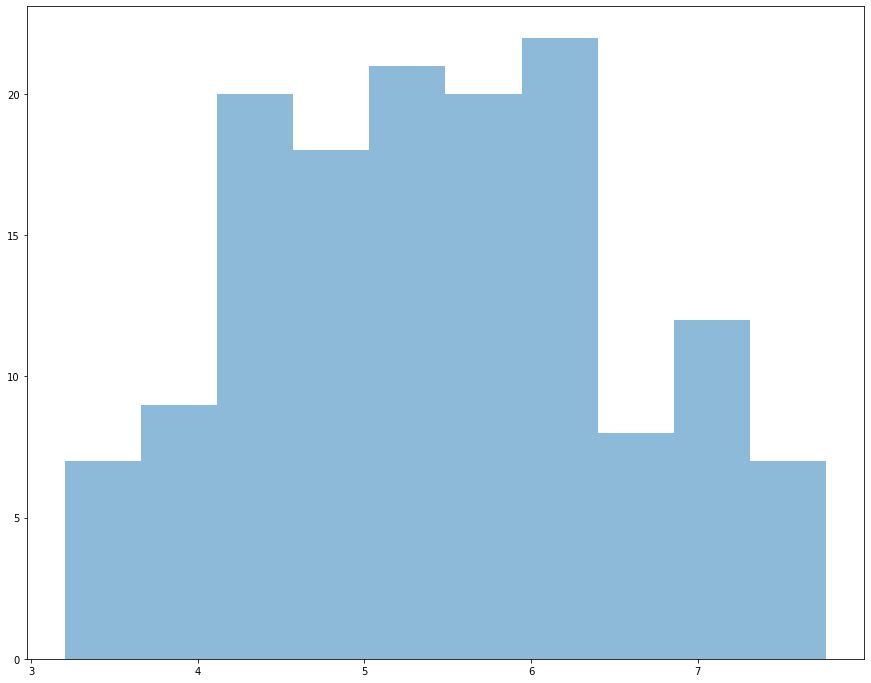

In [282]:
plt.hist(world_happiness_2019['Score'],alpha=0.5, label='2019')
plt.show()

Next, let's see how this score spread across different regions.

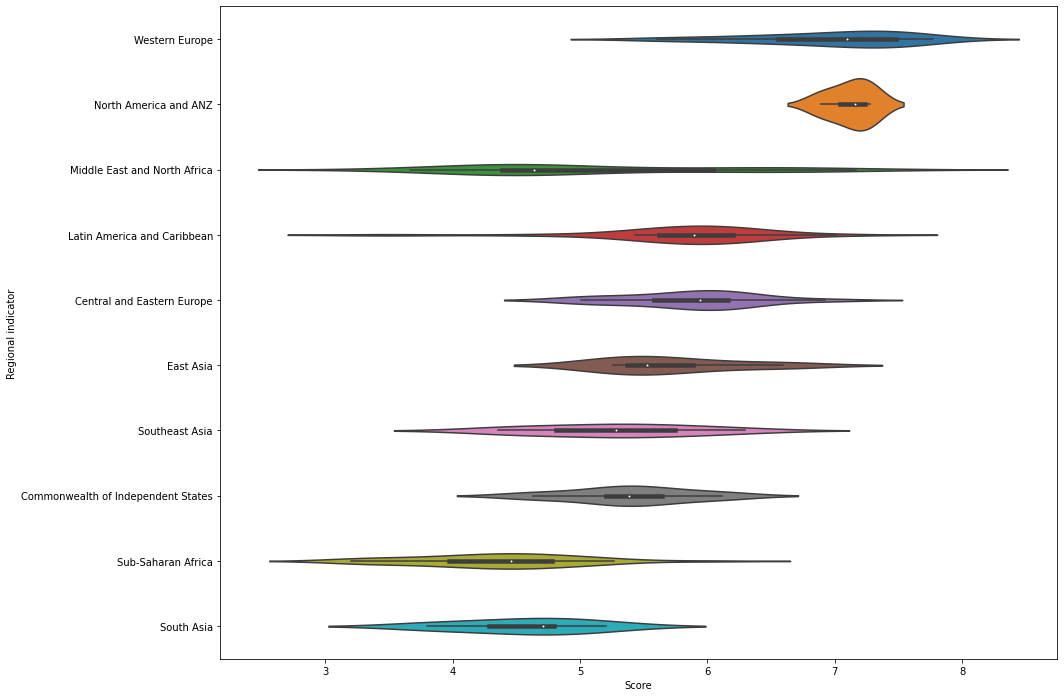

In [283]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(world_happiness_2019['Score'], world_happiness_2021['Regional indicator'])
plt.show()

It seems the most happy regions are from Western Europe and North America.

Now, let's answer the second question we have: What are the happiness scores across countries after Covid?

In [284]:
world_happiness_2021[['Country or region','Score']].sort_values(by=['Score'],ascending=False).head()

Country or region  Score
0           Finland  7.842
1           Denmark  7.620
2       Switzerland  7.571
3           Iceland  7.554
4       Netherlands  7.464

In [285]:
world_happiness_2021[['Country or region','Score']].sort_values(by=['Score'],ascending=True).head()

Country or region  Score
148       Afghanistan  2.523
147          Zimbabwe  3.145
146            Rwanda  3.415
145          Botswana  3.467
144           Lesotho  3.512

So even after Covid, Finland is the happiest country in the world while Afghanistan is the least. Let's see how the happiness score distribute.

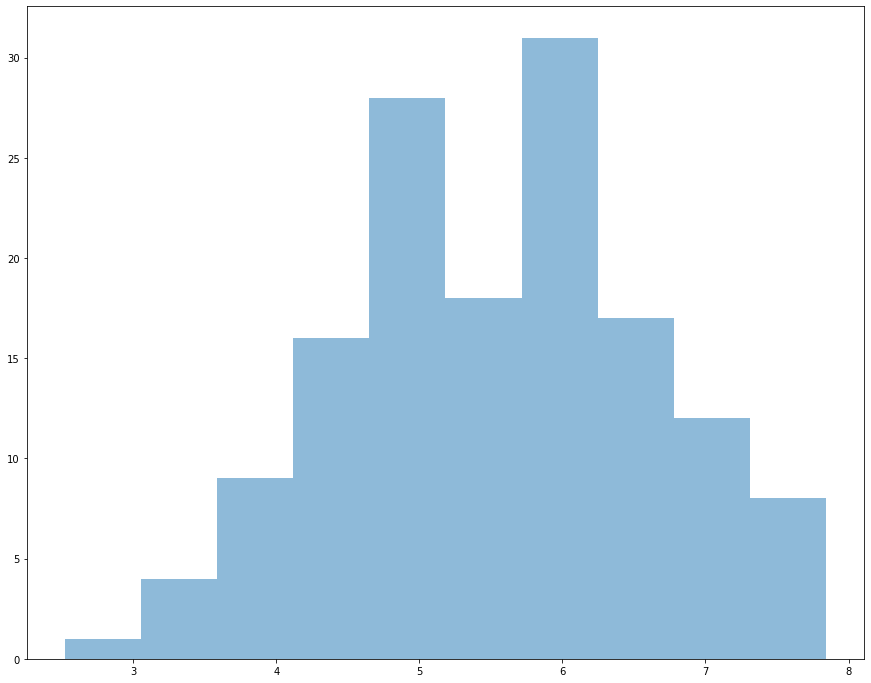

In [286]:
plt.hist(world_happiness_2021['Score'],alpha=0.5, label='2021')
plt.show()

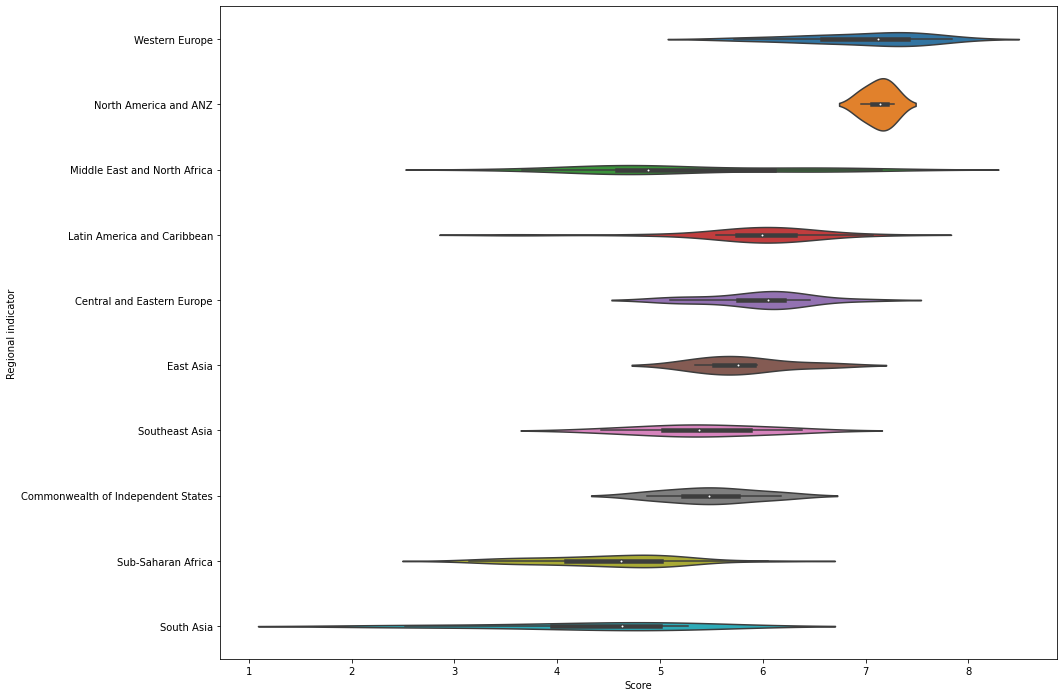

In [287]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(world_happiness_2021['Score'], world_happiness_2021['Regional indicator'])
plt.show()

Now, let's compare the distribution of the happiness score directly before and after Covid.

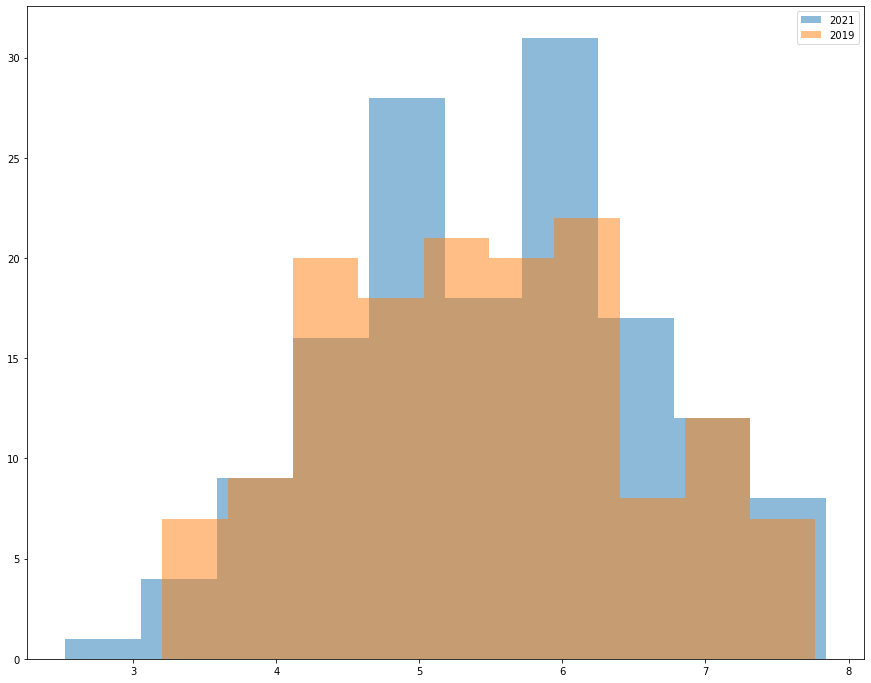

In [288]:
plt.hist(world_happiness_2021['Score'],alpha=0.5, label='2021')
plt.hist(world_happiness_2019['Score'],alpha=0.5, label='2019')
plt.legend(loc='upper right')
plt.show()

We see that Covid did not seem to change the happiness score of many countries much. But it does widen the distribution, making some happy countries more happy and some distressed countries more distressed.

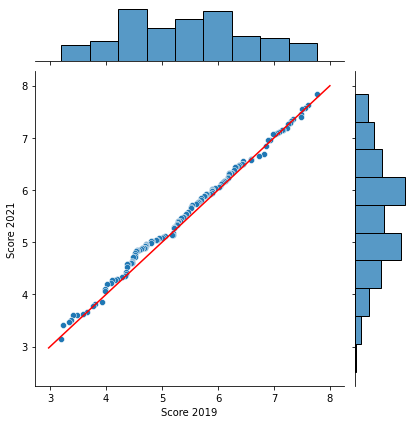

In [289]:
g=sns.jointplot(y=world_happiness_2021['Score'], x=world_happiness_2019['Score'])
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, '-r')
g.set_axis_labels('Score 2019', 'Score 2021')
plt.show()

Since the dots follow the diagoline quite closely, it seems Covid does not seem to affect the happiness score of the world much. Next, let's directly compare how the score shift.

In [290]:
worldhappinesdiff=world_happiness_2019[['Country or region','Regional indicator','Score']]
worldhappinesdiff=worldhappinesdiff.merge(world_happiness_2021[['Country or region','Score']], on='Country or region', how='left')

In [291]:
worldhappinesdiff.head()

Country or region Regional indicator  Score_x  Score_y
0           Finland     Western Europe    7.769    7.842
1           Denmark     Western Europe    7.600    7.620
2            Norway     Western Europe    7.554    7.392
3           Iceland     Western Europe    7.494    7.554
4       Netherlands     Western Europe    7.488    7.464

In [292]:
worldhappinesdiff.rename(columns={"Score_x":"Score_2019","Score_y":"Score_2021"},
                            inplace=True)

In [293]:
worldhappinesdiff['score diff']=worldhappinesdiff['Score_2021']-worldhappinesdiff['Score_2019']

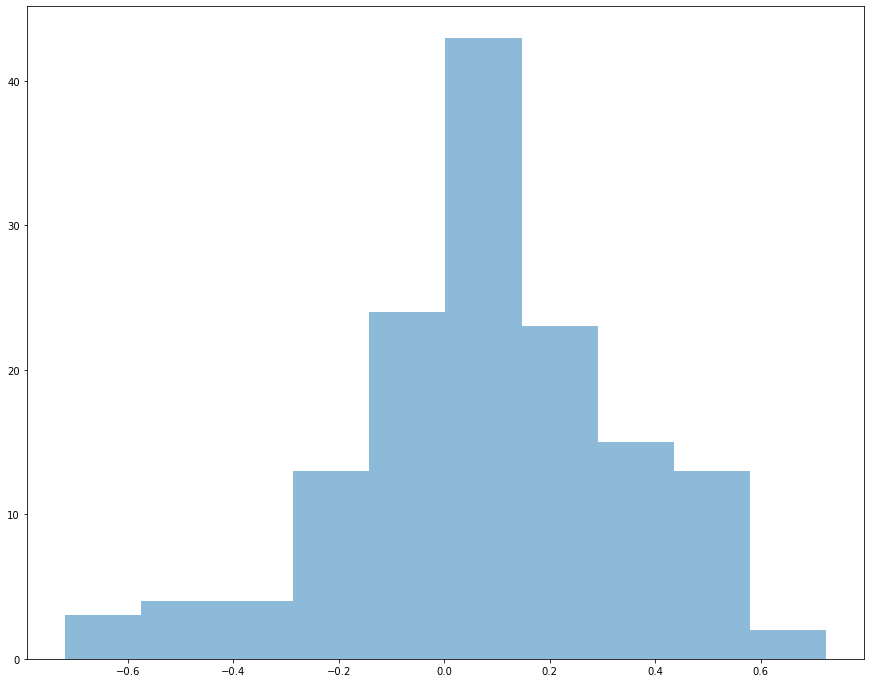

In [294]:
plt.hist(worldhappinesdiff['score diff'],alpha=0.5)
plt.show()

In [295]:
worldhappinesdiff['score diff'].mean()

0.0820486111111112

The happiness score mean actually increases by a small amount. It seems that by 2021 most countries happiness scores have stabilized back to pre-Covid era. Let's take a look at how this score change distribute in different regions.

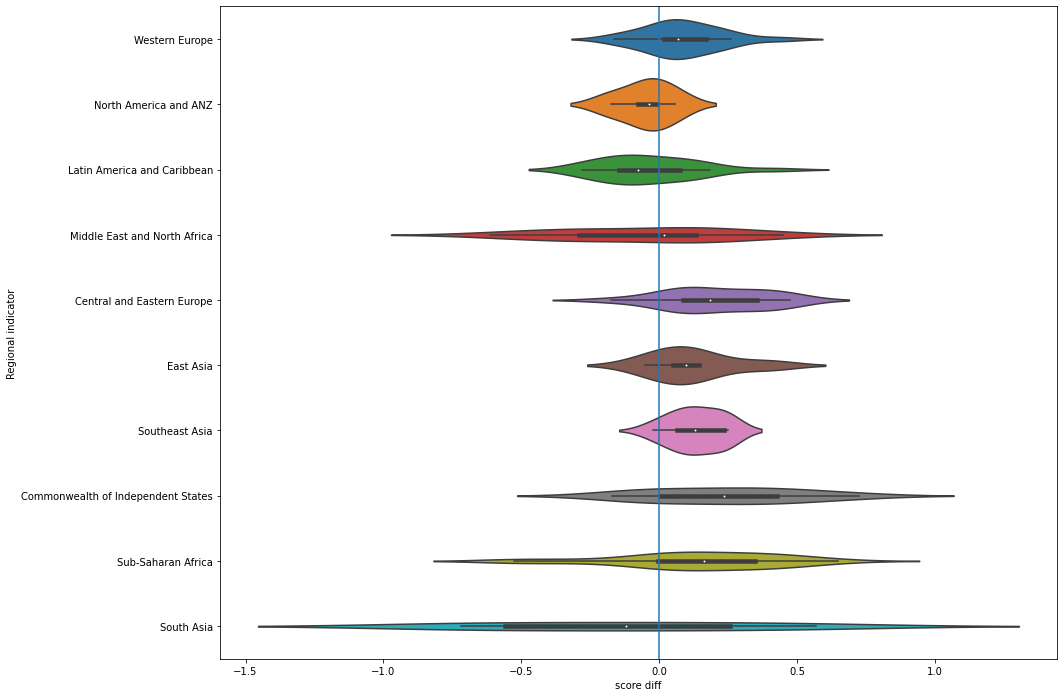

In [296]:
sns.violinplot(worldhappinesdiff['score diff'], worldhappinesdiff['Regional indicator'])
plt.axvline(0, 0,2)
plt.show()

It seems that most country in North America, Latin America, South Asia, Middle East have their happiness scores down. While the other regions have their score up. 

Now, let's use the Covid dataset to answer the question: how many people die due to Covid?

In [297]:
covidtill2021[['Country or region','Regional indicator','Total Cases/1M population']].sort_values(by=['Total Cases/1M population'],ascending=False).head()

Country or region                  Regional indicator  \
88         Montenegro          Central and Eastern Europe   
44            Georgia  Commonwealth of Independent States   
32     Czech Republic          Central and Eastern Europe   
119          Slovenia          Central and Eastern Europe   
76          Lithuania          Central and Eastern Europe   

     Total Cases/1M population  
88                      252512  
44                      219088  
32                      210728  
119                     207199  
76                      180834

In [298]:
covidtill2021[['Country or region','Regional indicator','Total Cases/1M population']].sort_values(by=['Total Cases/1M population'],ascending=True).head()

Country or region            Regional indicator  Total Cases/1M population
25              China                     East Asia                         69
97              Niger            Sub-Saharan Africa                        279
141             Yemen  Middle East and North Africa                        326
23               Chad            Sub-Saharan Africa                        333
127          Tanzania            Sub-Saharan Africa                        423

Hmm, in term of cases per 1M population, Montenegro has the biggest cases while China has the smallest.

In [299]:
covidtill2021[['Country or region','Regional indicator','Deaths/1M population']].sort_values(by=['Deaths/1M population'],ascending=False).head()

Country or region           Regional indicator  Deaths/1M population
105                    Peru  Latin America and Caribbean                  5990
17                 Bulgaria   Central and Eastern Europe                  4228
14   Bosnia and Herzegovina   Central and Eastern Europe                  3930
53                  Hungary   Central and Eastern Europe                  3723
88               Montenegro   Central and Eastern Europe                  3711

In [300]:
covidtill2021[['Country or region','Regional indicator','Deaths/1M population']].sort_values(by=['Deaths/1M population'],ascending=True).head()

Country or region     Regional indicator  Deaths/1M population
25             China              East Asia                     3
19           Burundi     Sub-Saharan Africa                     3
95       New Zealand  North America and ANZ                     9
97             Niger     Sub-Saharan Africa                    10
23              Chad     Sub-Saharan Africa                    11

In term of deaths per 1M population, Peru is the highest while China is the least again.

In [301]:
covidtill2021.head()

Country or region  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0       Afghanistan       157508          7317         140911.0        9280.0   
1           Albania       201902          3115         192428.0        6359.0   
2           Algeria       211662          6111         145350.0       60201.0   
3         Argentina      5343153        116680        5203809.0       22664.0   
4           Armenia       341058          7718         322406.0       10934.0   

   Total Cases/1M population  Deaths/1M population  Total Tests  \
0                       3920                   182     798660.0   
1                      70268                  1084    1406517.0   
2                       4706                   136     230861.0   
3                     116693                  2548   26452899.0   
4                     114790                  2598    2411285.0   

   Tests/1M population  Population                  Regional indicator  
0              19878.0    40178842                          South Asia  
1             489512.0     2873305          Central and Eastern Europe  
2               5132.0    44981074        Middle East and North Africa  
3             577723.0    45788182         Latin America and Caribbean  
4             811564.0     2971159  Commonwealth of Independent States

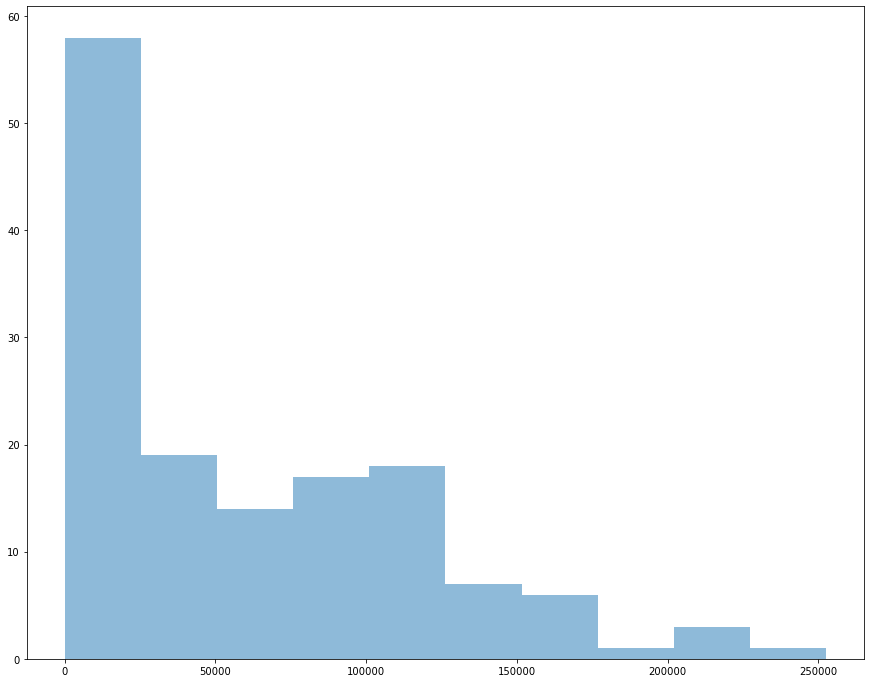

In [302]:
plt.hist(covidtill2021['Total Cases/1M population'],alpha=0.5)
plt.show()

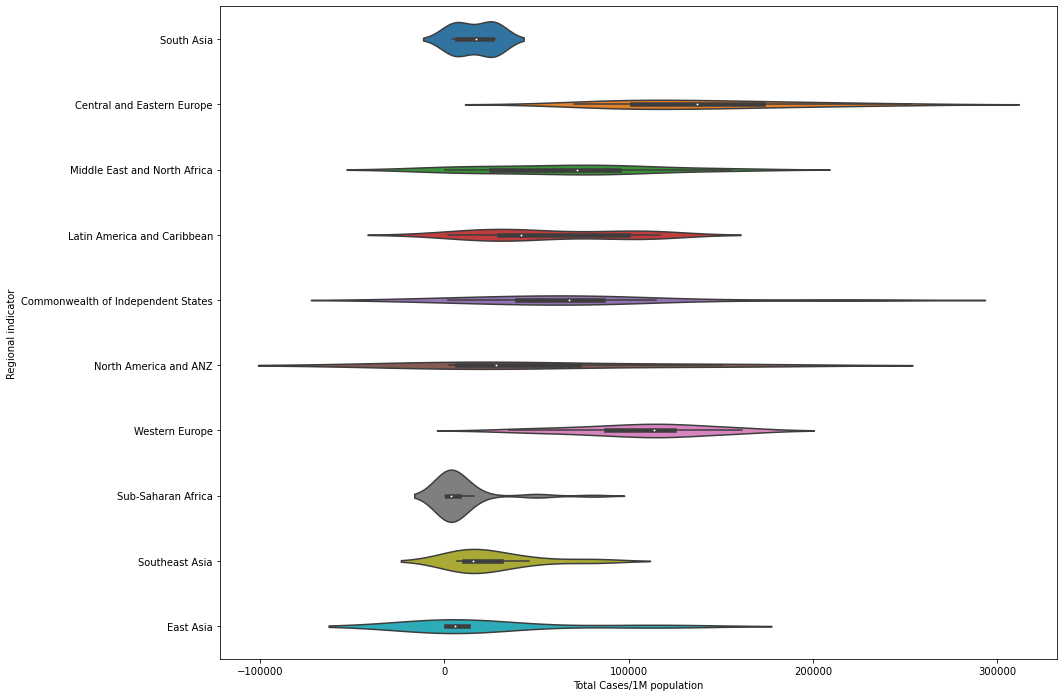

In [303]:
sns.violinplot(covidtill2021['Total Cases/1M population'], covidtill2021['Regional indicator'])
plt.show()

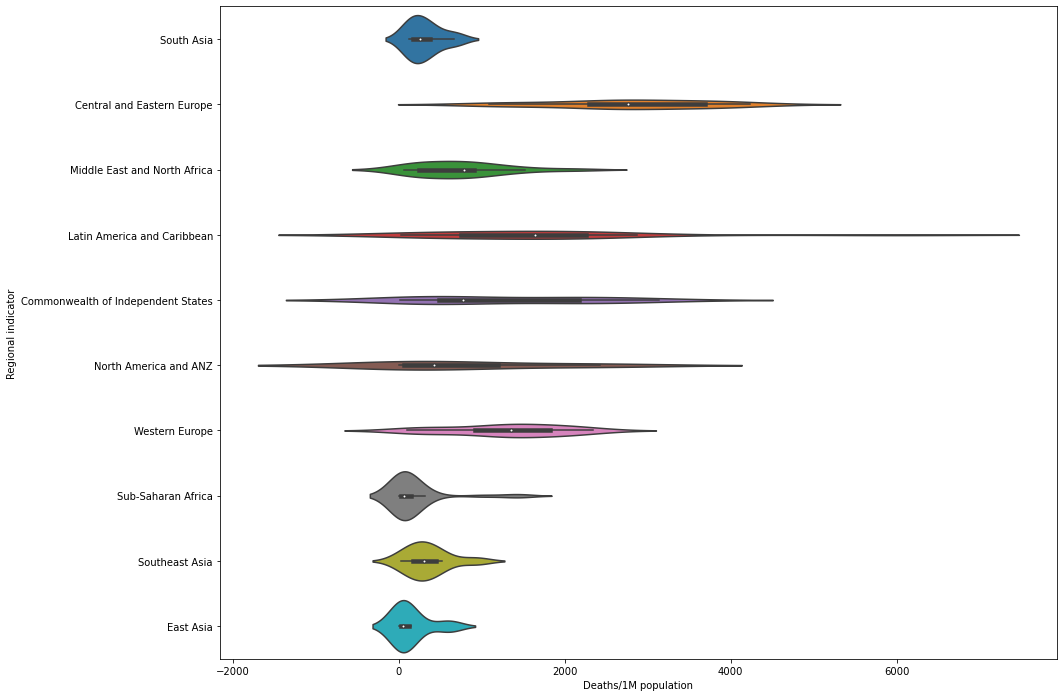

In [304]:
sns.violinplot(covidtill2021['Deaths/1M population'], covidtill2021['Regional indicator'])
plt.show()

According to these graphs, the regions that are most devastated by Covid are Central, Eastern Europe and Latin America. It's rather strange that even though Covid originated from Asia, Asia's death tolls are rather small compared to other regions.

Perhaps a better indicator of Covid is the number of cases per test.

In [305]:
covidtill2021['Cases per Test']=covidtill2021['Total Cases']/covidtill2021['Total Tests']

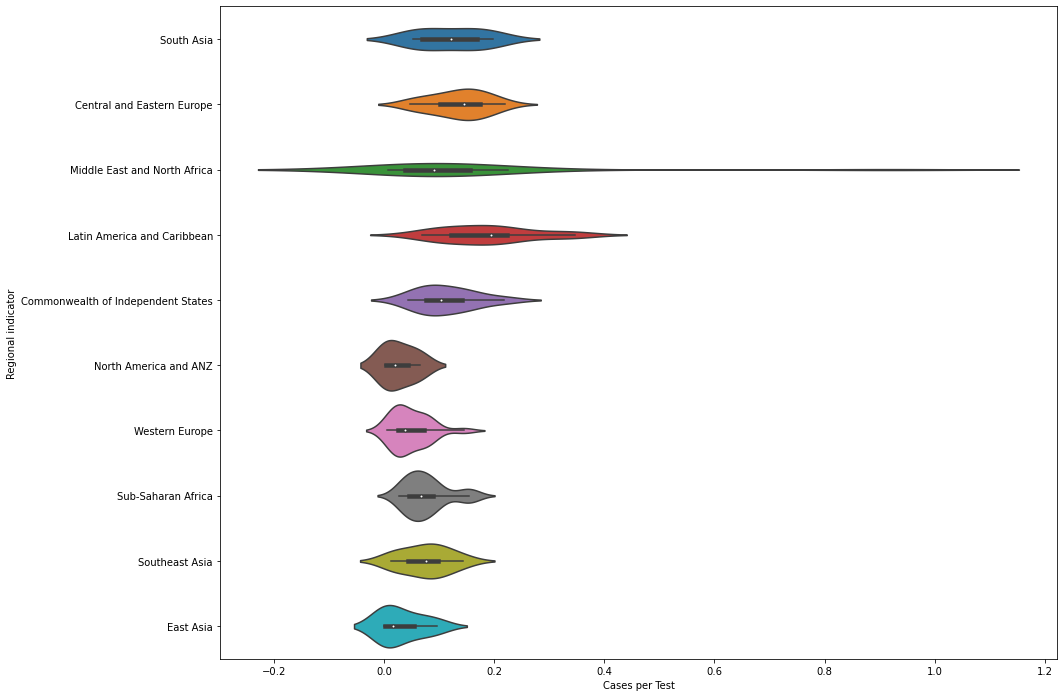

In [306]:
sns.violinplot(covidtill2021['Cases per Test'], covidtill2021['Regional indicator'])
plt.show()

Using the number of cases per test, we see that most the regions fall in line much better. The values of Asia regions are now comparable to regions in America.

Now, let's check how Covid affect the happiness scores by using a correlation heat map.

In [307]:
covidtill2021=covidtill2021.merge(worldhappinesdiff[['Country or region','score diff']], on='Country or region', how='left')

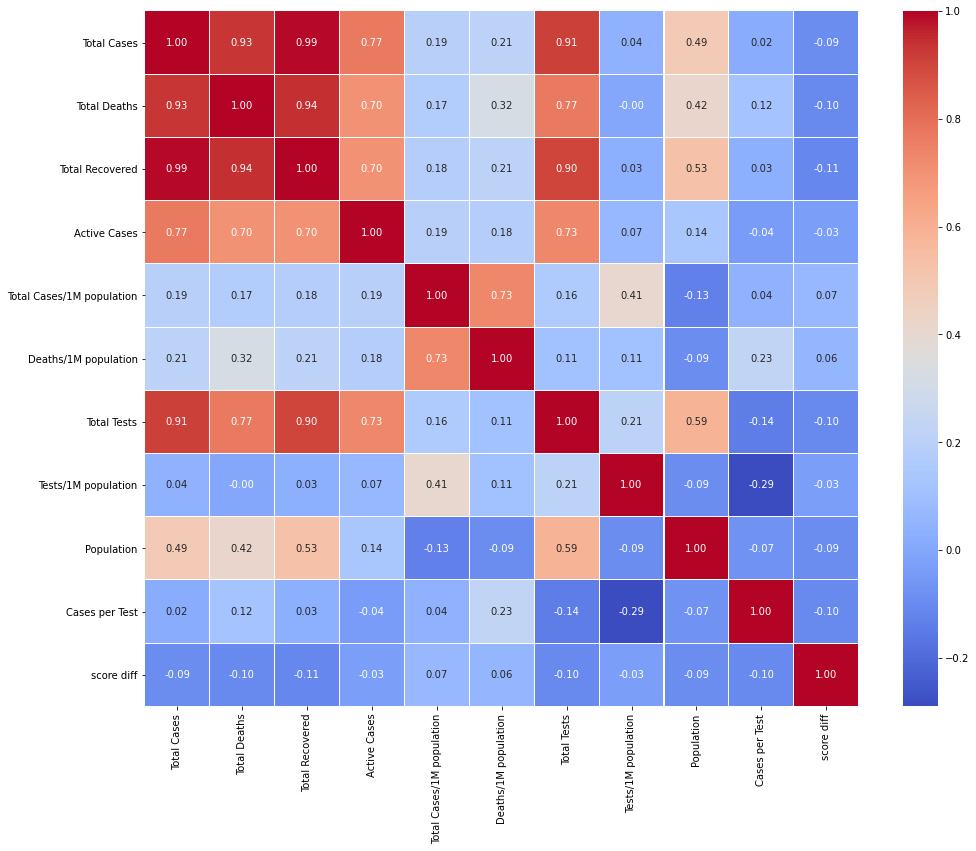

In [308]:
corrmat = covidtill2021.corr()
f, ax = plt.subplots(figsize=(16, 12))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
plt.savefig("Feature_correlation.png", bbox_inches="tight")

From this, we see that the Total Cases is negatively correlated to the happiness score change. This shows that countries with more covid cases tend to have their happiness score lower but not much.

# Conclusion

In this project, we have explored the happiness score of the world before and after Covid. Finland remains the happiest country before and after Covid, and Afghanistan remains the most distressed country before and after Covid. In general, Covid does make the happiness score lower for a country but not by much. In addition, Covid also widens the distribution of the happiness score. In other words, it makes happy countries happier and distressed countries more distressed. Finally, just looking at the number of deaths, cases per population by Covid is not enough to gauge Covid's severity in a country. Another essential factor that should be considered is the number of patients per number of tests. 